These files has only 4 registers that it seems that don't need any process to views if this are correct.

Loading Data in Pandas DataFrame format
Use nrows to limit data analise to get faster (but limited) results. If you wan all data put a huge value in this var.

In [1]:
import pandas as pd
from Util import loadJson,loadCsv,saveJson

nrows = 10000
data1 = loadCsv('H-HTU21-measures.csv','H-HTU21',nrows);
data2 = loadJson('T-HTU21-measures.json','T-HTU21',nrows);

As we make an outer join we can view that one row of each other has not the same time.

In [2]:
data= data1.join(data2.set_index('time'), on='time', how='outer', sort=True )
print(data.isna().sum())

data= data1.join(data2.set_index('time'), on='time', how='inner', sort=True )
print(data.isna().sum())


H-HTU21    251
time         0
T-HTU21    251
dtype: int64
H-HTU21    0
time       0
T-HTU21    0
dtype: int64


We can view graphically that holes in data are common for H and T data.
Observing plots we observe some inerferences on H.

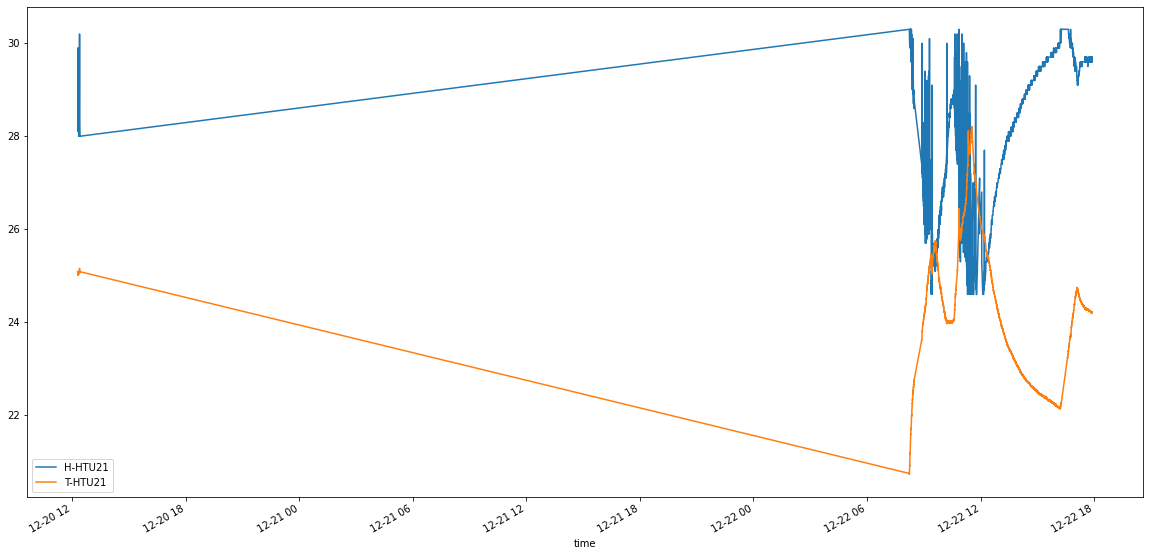

In [3]:
data5 = data[data['H-HTU21'].between(data['H-HTU21'].quantile(.05), data['H-HTU21'].quantile(.95))]
data5.plot.line(x = 'time',figsize=(20,10))

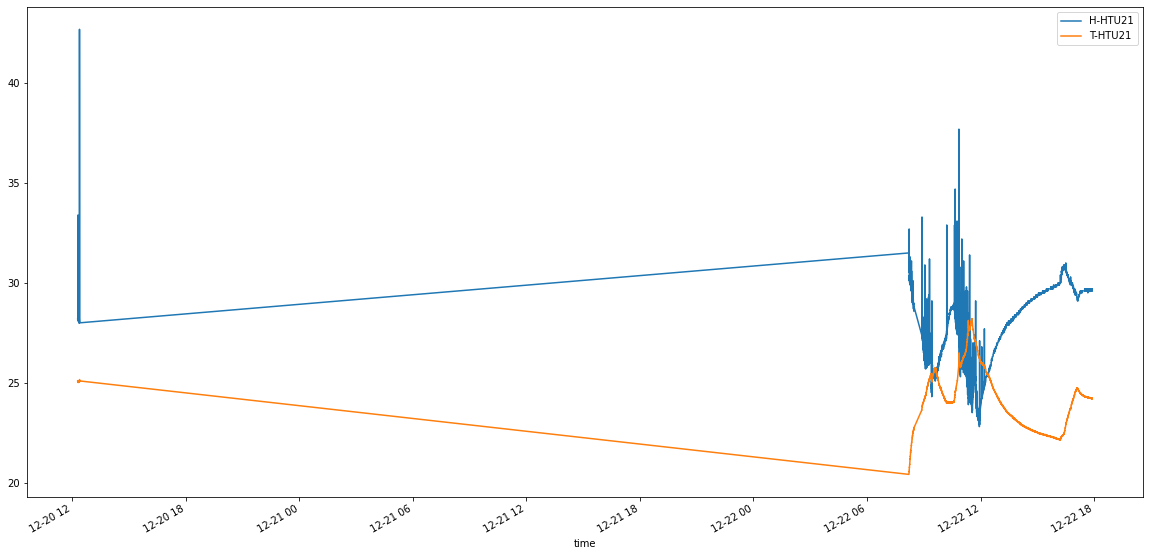

In [4]:
data.describe()

data.plot.line(x = 'time',figsize=(20,10))

Finally, we save data combined to further use

In [5]:
saveJson('HTU21-measures.json', data)




